In [2]:
import sys
sys.path.append('A:\MSBGD\Data_Challenge')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
import mlflow
random_state = 42

In [3]:
with open('../data/data-challenge-student.pickle', 'rb') as handle:
    # dat = pickle.load(handle)
    dat = pd.read_pickle(handle)
X = dat['X_train']
Y = dat['Y']
S = dat['S_train']

d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender_class', ylabel='Count'>

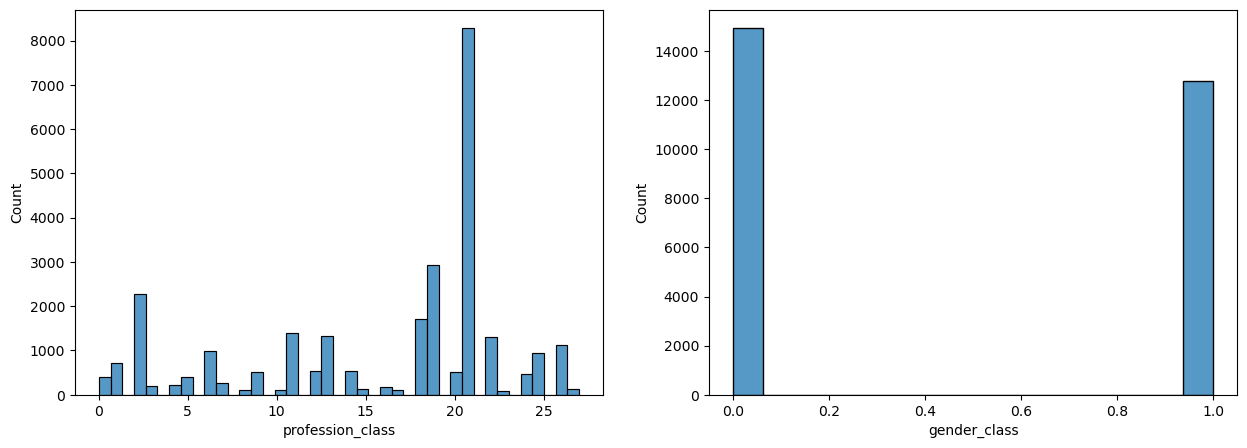

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(Y,) 
plt.subplot(1,2,2)
sns.histplot(S)


In [5]:
print(X.iloc[:,1])

28553    0.202686
6286     0.003188
36284    0.210670
12083    0.118481
7859    -0.052143
           ...   
6265    -0.340833
11284   -0.081198
38158   -0.441524
860     -0.053005
15795    0.010459
Name: 1, Length: 27749, dtype: float32


d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='200', ylabel='Count'>

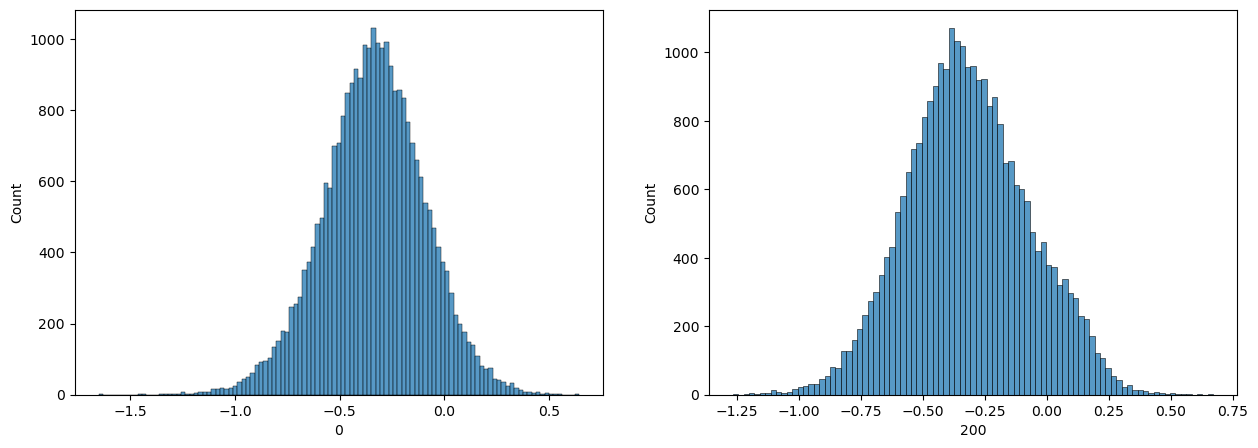

In [6]:
# distribution of X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(X.iloc[:,0])
plt.subplot(1,2,2)
sns.histplot(X.iloc[:,200])

In [7]:
# normalize X
X_norm = (X - X.mean()) / X.std()

d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender_class', ylabel='Count'>

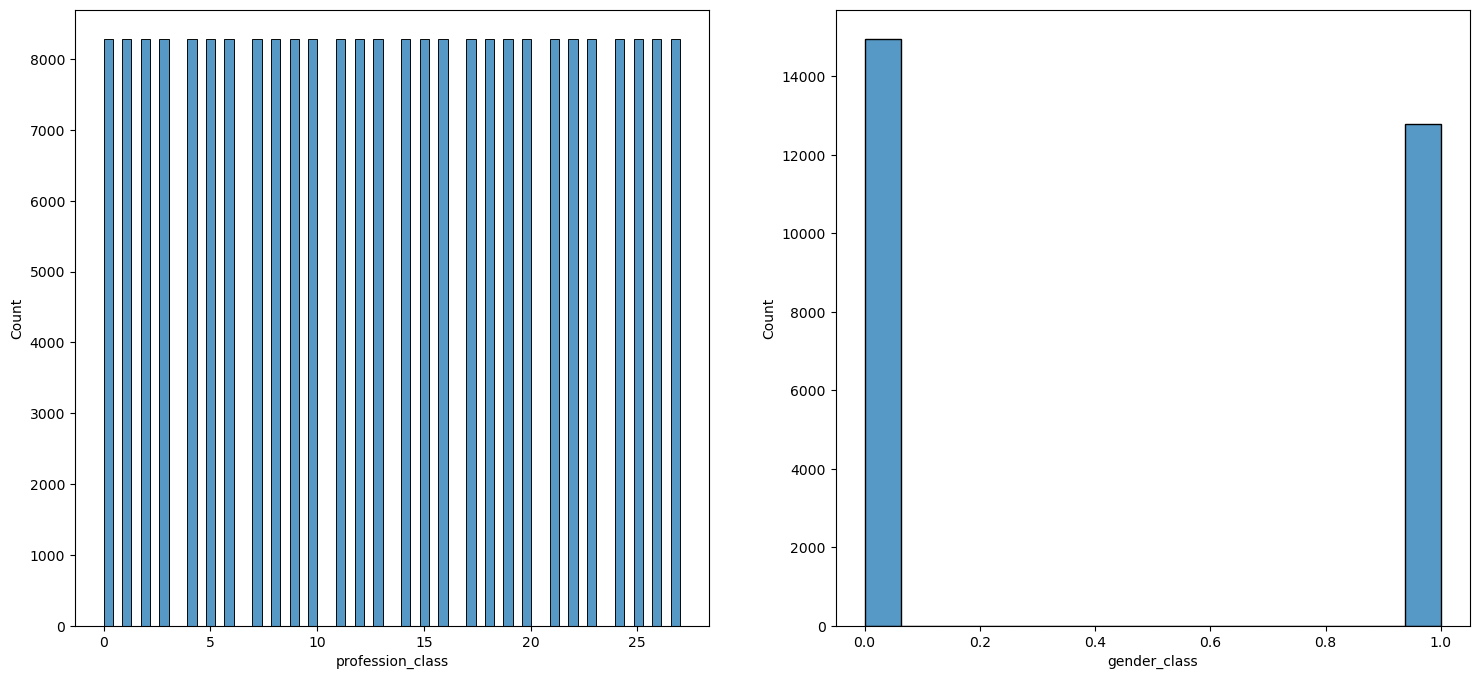

In [8]:
# balance classes with SMOTE
sm = SMOTE(random_state=random_state)
X_res, Y_res = sm.fit_resample(X_norm, Y)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.histplot(Y_res,)
plt.subplot(1,2,2)
sns.histplot(S)

d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='200', ylabel='Count'>

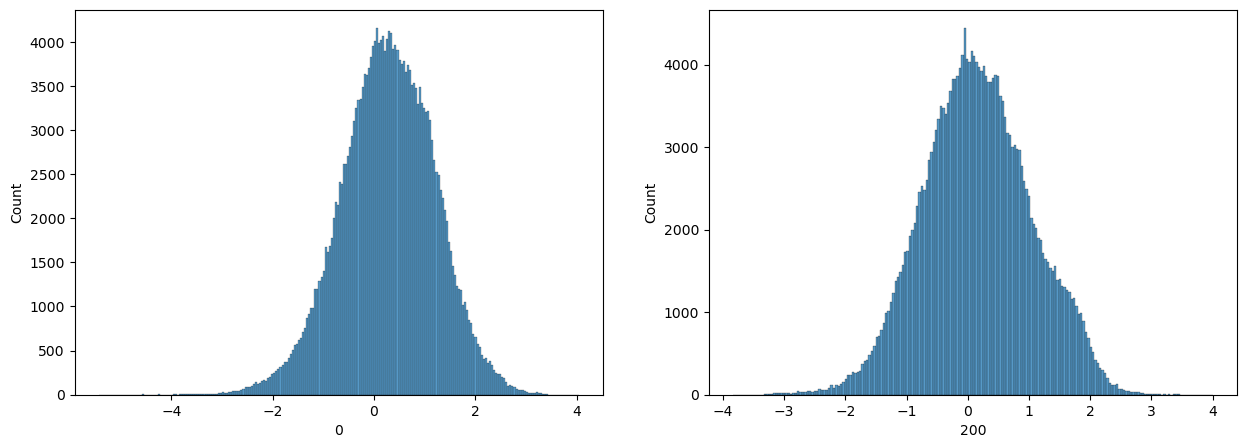

In [9]:
# distribution of X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(X_res.iloc[:,0])
plt.subplot(1,2,2)
sns.histplot(X_res.iloc[:,200])

<Axes: >

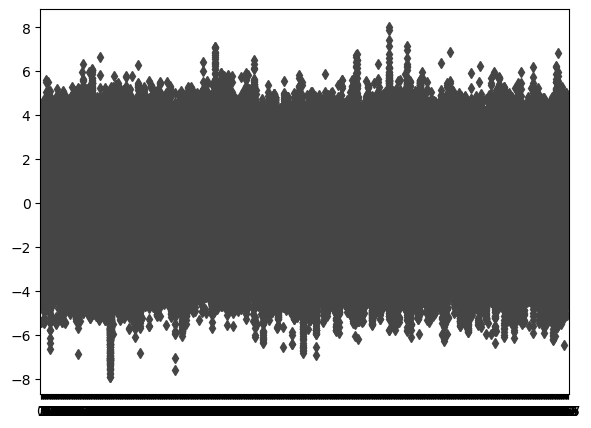

In [10]:
# boxplot of X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_res)

In [11]:
print(X_res.shape)
# find nan values


(231980, 768)


In [18]:
import numpy as np
import pandas as pd
def add_random_noise(data, mu=0, sigma=0.01, fraction=1.0):
    """
    Add random Gaussian noise to specified columns of the dataframe.
    
    :param data: DataFrame containing your data
    :param columns: List of column names to which noise should be added
    :param mu: Mean of the Gaussian distribution to generate noise from
    :param sigma: Standard deviation of the Gaussian distribution
    :param fraction: Fraction of rows to augment with noise
    :return: DataFrame with added noise
    """
    augmented_data = data.copy()
    # Select a fraction of the data to augment
    rows_to_augment = np.random.choice(augmented_data.index, size=int(len(augmented_data) * fraction), replace=False)
    for column in data.columns:
        # Only add noise to the selected rows
        noise = np.random.normal(mu, sigma, size=len(rows_to_augment))
        augmented_data.loc[rows_to_augment, column] += noise
    return augmented_data
  # Replace these with your actual column names
augmented_data = add_random_noise(data=X_res, mu=0, sigma=0.01, fraction=0.5)

print(augmented_data.shape)


(231980, 768)


In [20]:
X_res.shape

(231980, 768)

In [187]:
X_train, X_val, Y_train, Y_val = train_test_split(X_res, Y_res, test_size=0.2, random_state=random_state)

In [188]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(768, 256) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 28)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [ ]:
# mlp = MLP()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(mlp.parameters(), lr=0.01)
# 
# # train the model with mlflow
# 
# print(X_res[:2])
# print(Y_res[:2])
# for epoch in range(30):
#     inputs = X_res[:2]
#     labels = Y_res[:2]
#     inputs = torch.tensor(inputs.values).float()
#     labels = torch.tensor(labels.values).long()
#     outputs = mlp(inputs)
#     loss = criterion(outputs, labels)
#     print(loss)
#     loss.backward()
#     optimizer.step()
#     print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000, loss.item()))
# 
# # print prediction and true label
# print(outputs)
# print(labels)

        0         1         2         3         4         5         6    \
0  0.729705  0.893307  1.052398 -0.245486  0.939000 -0.153556 -1.484978   
1  1.458828  0.022887 -1.109332 -0.567263  0.530419  0.014908  0.388898   

        7         8         9    ...       758       759       760       761  \
0 -0.635741  0.022123 -1.014857  ...  0.367281  1.084962  2.613393  0.092459   
1  0.058353 -0.791927 -0.569611  ... -0.140000 -0.957720 -0.304713 -1.857246   

        762       763       764       765       766       767  
0  1.474127  0.278868 -1.615864 -0.080357 -0.604681  1.271198  
1 -2.070409 -0.049790  0.526030  0.172823 -0.271252 -0.285356  

[2 rows x 768 columns]
0    6
1    9
Name: profession_class, dtype: int64
tensor(3.3413, grad_fn=<NllLossBackward0>)
Epoch [1/1000], Loss: 3.3413
tensor(2.4559, grad_fn=<NllLossBackward0>)
Epoch [2/1000], Loss: 2.4559
tensor(2.3937, grad_fn=<NllLossBackward0>)
Epoch [3/1000], Loss: 2.3937
tensor(2.3918, grad_fn=<NllLossBackward0>)
Epoch [

In [190]:
def train_model(model, X, Y, epochs, lr, batch_size):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            inputs = X[i:i+batch_size]
            labels = Y[i:i+batch_size]
            inputs = torch.tensor(inputs.values).float()
            labels = torch.tensor(labels.values).long()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
        mlflow.log_metric('loss', loss.item(), step=epoch+1)
    return model

mlflow.set_experiment('mlp')
mlp = MLP()
mlp = train_model(mlp, X_train, Y_train, 30, 0.001, 1000)

# test model
inputs = X_val
labels = Y_val
inputs = torch.tensor(inputs.values).float()
labels = torch.tensor(labels.values).long()
mlp.eval()
with torch.no_grad():
    outputs = mlp(inputs)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(outputs, labels)
    print('Val Loss: {:.4f}'.format(loss.item()))
    print("Accuracy: ", (outputs.argmax(1) == labels).sum().item() / labels.shape[0])

    X_test = dat['X_test']
    X_test = (X_test - X_test.mean()) / X_test.std()
    inputs = X_test
    inputs = torch.tensor(inputs.values).float()
    pred = mlp(inputs)
    pred = pred.argmax(1)
    results=pd.DataFrame(pred, columns= ['score'])
    results.to_csv("Data_Challenge_MDI_341.csv", header = None, index = None)

2024/03/09 17:36:12 INFO mlflow.tracking.fluent: Experiment with name 'mlp' does not exist. Creating a new experiment.


Epoch [1/30], Loss: 2.4819
Epoch [2/30], Loss: 2.4552
Epoch [3/30], Loss: 2.4402
Epoch [4/30], Loss: 2.4289
Epoch [5/30], Loss: 2.4215
Epoch [6/30], Loss: 2.4181
Epoch [7/30], Loss: 2.4155
Epoch [8/30], Loss: 2.4133
Epoch [9/30], Loss: 2.4106
Epoch [10/30], Loss: 2.4085
Epoch [11/30], Loss: 2.4070
Epoch [12/30], Loss: 2.4057
Epoch [13/30], Loss: 2.4049
Epoch [14/30], Loss: 2.4042
Epoch [15/30], Loss: 2.4036
Epoch [16/30], Loss: 2.4027
Epoch [17/30], Loss: 2.4024
Epoch [18/30], Loss: 2.4002
Epoch [19/30], Loss: 2.3991
Epoch [20/30], Loss: 2.3987
Epoch [21/30], Loss: 2.3989
Epoch [22/30], Loss: 2.3982
Epoch [23/30], Loss: 2.3981
Epoch [24/30], Loss: 2.3981
Epoch [25/30], Loss: 2.3979
Epoch [26/30], Loss: 2.3982
Epoch [27/30], Loss: 2.3966
Epoch [28/30], Loss: 2.3965
Epoch [29/30], Loss: 2.3963
Epoch [30/30], Loss: 2.3967
Test Loss: 2.4066
Accuracy:  0.9666781619105095


In [11]:
datapath = "../data/data-challenge-student.pickle"
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from fairlearn.preprocessing import CorrelationRemover
from sklearn.model_selection import train_test_split

with open(datapath, 'rb') as handle:
        data = pd.read_pickle(handle)
        X_init = data['X_train']
        Y_init = data['Y']
        S_init = data['S_train']

scaler = StandardScaler().fit(X_init)
X_pre = scaler.transform(X_init)

X_init = pd.DataFrame(X_init, columns=data['X_train'].columns)
X_concat = pd.concat([X_init, S_init], axis=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_concat, Y_init, test_size=0.2, stratify=Y_init, random_state=42)

X_S_train = pd.DataFrame(X_train)
X_S_train.columns = X_S_train.columns.astype(str)

X_S_val = pd.DataFrame(X_val)
X_S_val.columns = X_S_val.columns.astype(str)

cr = CorrelationRemover(sensitive_feature_ids=["gender_class"])
X_cr_train = cr.fit_transform(X_S_train)
X_cr_train = pd.DataFrame(X_cr_train)
X_cr_train.set_index(X_S_train.index, inplace=True)
X_cr_train.loc[:, "gender_class"] = X_S_train.loc[:, "gender_class"]
X_cr_val = cr.transform(X_S_val)
X_cr_val = pd.DataFrame(X_cr_val)
X_cr_val.set_index(X_S_val.index, inplace=True)
X_cr_val.loc[:, "gender_class"] = X_S_val.loc[:, "gender_class"]
S_train_cr = X_cr_train['gender_class']
S_val_cr = X_cr_val['gender_class']

X_cr_train.drop(columns='gender_class', inplace=True)

print(S_train_cr.shape,S_val_cr.shape)
print(X_cr_train.head())

(22199,) (5550,)
            0         1         2         3         4         5         6    \
38133 -0.430424  0.180743 -0.352488 -0.738808  0.139531 -0.054747  0.274845   
13072 -0.375617 -0.336236 -1.077061 -0.540785 -0.209775 -0.557074 -0.103562   
27793 -0.424885  0.042672 -0.108632 -0.592146 -0.351684  0.089643  0.241904   
32036 -0.613650 -0.127509 -0.784984 -0.492322  0.488270  0.319304 -0.215311   
31931 -0.716244  0.094693 -0.473517 -0.833537  0.092252 -0.197060  0.294664   

            7         8         9    ...       758       759       760  \
38133 -0.321852 -0.055879 -0.636821  ...  0.048650 -0.540780 -0.036985   
13072  0.030465  0.122188 -0.379715  ...  0.176068 -0.688907  0.209530   
27793  0.283434 -0.280463 -0.393202  ...  0.193397 -0.384557  0.386147   
32036  0.247655 -0.167541 -0.078513  ... -0.043819 -0.346770 -0.160579   
31931  0.238454  0.236230 -0.790816  ... -0.016822 -0.602734  0.110847   

            761       762       763       764       765       7